# <font color=red>Chapter 3. Labeling</font>

## Exercises

**3.1** From dollar bars for MFIB future:

> **a)** Apply a symmetric CUMSUM filter where the threshold is the standard deviation of daily returns (snippet 3.1)

> **b)** Use Snippet 3.4 on pandas series *t1*, where *numDays* = 1

> **c)** On those sampled features, apply the triple-barrier method, where *ptSl*= [1,1] and *t1* is the series you created in point 1.b

> **d)** Apply *getBins* to generate the labels.

## a)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ML_Finance as mlf
import os
%load_ext autoreload
%autoreload 2

In [2]:
data = os.path.join('..','data','MFIBtick.xlsx')
mfib_tick_data = pd.read_excel(data,parse_dates=[['Date','Time']])

In [3]:
mfib_tick_data.set_index('Date_Time',inplace=True)

In [4]:
dollar_bars = mlf.dollar_bars(mfib_tick_data)

In [5]:
dollar_bars.tail()

,Open,Close,High,Low,Volume
Date_Time,,,,,
2020-11-03 17:32:34,18925,18920,18940,18910,433
2020-11-03 18:04:14,18925,18910,18965,18910,431
2020-11-03 20:37:22,18910,18950,18960,18875,431
2020-11-03 21:34:22,18955,19080,19080,18930,428
2020-11-03 22:06:17,19080,18924,19100,18924,428


In [6]:
# DAILY VOLATILITY ESTIMATE with EWMA
'''
We estimate volatility through the EWM, calcoliamo anche true volatility che servirà per compararla con quella stimata
'''
def getDailyVol(close,span0=100):
    # daily vol reindexed to close
    df0=close.index.searchsorted(close.index-pd.Timedelta(days=1))
    #searchsorted: Find indices where elements should be inserted to maintain order.
    #(close.index-pd.Timedelta(days=1) rappresenta l'index meno un giorno
    df0=df0[df0>0] # parte dal numero 19
    #considera solo index > di zero quindi in questo caso parte dal 24 agosto e non considera il 20 e 21
    df0=(pd.Series(close.index[df0-1], # riconsidera il 21 ma l'ultimo giorno non lo considera  (ovviamente df0 è composto da numeri es. 19,20,21...)
                   index=close.index[close.shape[0]-df0.shape[0]:]))   
    try:
        returns=close.loc[df0.index]/close.loc[df0.values].values-1 # daily rets tra una barra e quella del giorno prima quindi return di 1 giorno piu o meno
    except Exception as e:
        print(f'error: {e}\nplease confirm no duplicate indices')
    estimate_vol=returns.ewm(span=span0).std()#.rename('dailyVol')
    true_vol = returns.rolling(50).std()
    return estimate_vol,true_vol,returns

In [7]:
volatilities = pd.DataFrame({'estimate_vol':getDailyVol(dollar_bars.Close,50)[0],'true_vol':getDailyVol(dollar_bars.Close,50)[1]})
returns = getDailyVol(dollar_bars.Close,50)[2]

In [8]:
volatilities.iloc[:,0]

Date_Time
2020-08-24 09:00:41         NaN
2020-08-24 09:08:34    0.000717
2020-08-24 09:26:08    0.000898
2020-08-24 09:45:05    0.002105
2020-08-24 10:18:08    0.001816
                         ...   
2020-11-03 17:32:34    0.017228
2020-11-03 18:04:14    0.016934
2020-11-03 20:37:22    0.016854
2020-11-03 21:34:22    0.017045
2020-11-03 22:06:17    0.016773
Name: estimate_vol, Length: 1031, dtype: float64

In [9]:
returns

Date_Time
2020-08-24 09:00:41    0.008867
2020-08-24 09:08:34    0.007854
2020-08-24 09:26:08    0.009628
2020-08-24 09:45:05    0.012668
2020-08-24 10:18:08    0.009374
                         ...   
2020-11-03 17:32:34    0.033597
2020-11-03 18:04:14    0.028276
2020-11-03 20:37:22    0.036936
2020-11-03 21:34:22    0.044049
2020-11-03 22:06:17    0.031000
Name: Close, Length: 1031, dtype: float64

In [10]:
df=dollar_bars.Close.index.searchsorted(dollar_bars.Close.index-pd.Timedelta(days=1))

In [11]:
df=df[df>0]

In [12]:
df = pd.Series(dollar_bars.Close.index[df-1],index=dollar_bars.Close.index[dollar_bars.Close.shape[0]-df.shape[0]:])

In [13]:
df

Date_Time
2020-08-24 09:00:41   2020-08-21 21:58:12
2020-08-24 09:08:34   2020-08-21 21:58:12
2020-08-24 09:26:08   2020-08-21 21:58:12
2020-08-24 09:45:05   2020-08-21 21:58:12
2020-08-24 10:18:08   2020-08-21 21:58:12
                              ...        
2020-11-03 17:32:34   2020-11-02 17:17:35
2020-11-03 18:04:14   2020-11-02 17:57:31
2020-11-03 20:37:22   2020-11-02 19:24:13
2020-11-03 21:34:22   2020-11-02 19:24:13
2020-11-03 22:06:17   2020-11-02 21:55:00
Name: Date_Time, Length: 1031, dtype: datetime64[ns]

In [14]:
dollar_bars.Close.index-pd.Timedelta(days=1)

DatetimeIndex(['2020-08-20 09:05:06', '2020-08-20 09:15:41',
               '2020-08-20 09:22:46', '2020-08-20 09:43:06',
               '2020-08-20 10:22:29', '2020-08-20 11:49:59',
               '2020-08-20 12:50:26', '2020-08-20 13:47:21',
               '2020-08-20 14:02:58', '2020-08-20 14:19:32',
               ...
               '2020-11-02 15:59:03', '2020-11-02 16:15:01',
               '2020-11-02 16:38:37', '2020-11-02 16:58:08',
               '2020-11-02 17:18:23', '2020-11-02 17:32:34',
               '2020-11-02 18:04:14', '2020-11-02 20:37:22',
               '2020-11-02 21:34:22', '2020-11-02 22:06:17'],
              dtype='datetime64[ns]', name='Date_Time', length=1050, freq=None)

In [15]:
rolling_volat = dollar_bars.Close.pct_change().rolling(50).std()

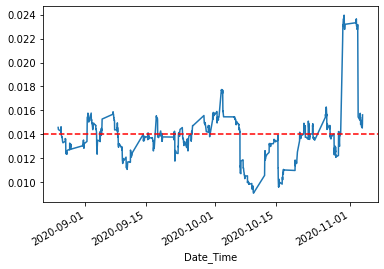

In [16]:
f,ax=plt.subplots()
(rolling_volat*np.sqrt(20)).plot(ax=ax)
ax.axhline((rolling_volat*np.sqrt(20)).mean(),ls='--',color='r') #moltiplico per sqrt(20) perche ogni giorno è fatto piu o meno di 20 dollars bars

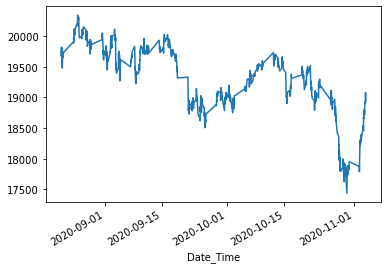

In [17]:
dollar_bars['Close'].plot()

In [18]:
# CUMSUM filter with daily volatility estimate as threshold
def getTEvents(gRaw, h):
    tEvents, sPos, sNeg = [], 0, 0
    for i in gRaw.index[1:]:
        try:
            pos, neg = float(sPos+gRaw.loc[i]), float(sNeg+gRaw.loc[i])
        except Exception as e:
            print(e)
            print(sPos+gRaw.loc[i], type(sPos+gRaw.loc[i]))
            print(sNeg+gRaw.loc[i], type(sNeg+gRaw.loc[i]))
            break
        sPos, sNeg=max(0., pos), min(0., neg)
        if sNeg<-h:
            sNeg=0;tEvents.append(i)
        elif sPos>h:
            sPos=0;tEvents.append(i)
        else:
            sPos=0
            sNeg=0
    return pd.DatetimeIndex(tEvents)

In [19]:
tEvents = getTEvents(volatilities.true_vol,volatilities.estimate_vol.mean())

In [20]:
tEvents

DatetimeIndex(['2020-08-27 11:13:35', '2020-08-27 12:00:59',
               '2020-08-27 13:14:25', '2020-08-27 15:08:55',
               '2020-08-27 15:26:57', '2020-08-27 15:52:10',
               '2020-08-27 16:13:40', '2020-08-27 16:36:57',
               '2020-08-27 17:08:11', '2020-08-27 17:30:06',
               ...
               '2020-11-03 15:59:03', '2020-11-03 16:15:01',
               '2020-11-03 16:38:37', '2020-11-03 16:58:08',
               '2020-11-03 17:18:23', '2020-11-03 17:32:34',
               '2020-11-03 18:04:14', '2020-11-03 20:37:22',
               '2020-11-03 21:34:22', '2020-11-03 22:06:17'],
              dtype='datetime64[ns]', length=442, freq=None)

## b)

In [21]:
#vertical barrier of 1 day
# dopo la nostra entrata in tEvents(in questo caso è la bara in cui daly volat > volatilità media)
# creiamo una uscita il giorno seguente
#ci dà 2 serie una con l'apertura e l'altra con la chiusura il gorno seguento

def addVerticalBarrier(tEvents, close, numDays=1):
    t1=close.index.searchsorted(tEvents+pd.Timedelta(days=numDays))
    t1=t1[t1<close.shape[0]]
    t1=(pd.Series(close.index[t1],index=tEvents[:t1.shape[0]]))
    return t1

t1 = addVerticalBarrier(tEvents,dollar_bars.Close,numDays=1)

In [22]:
t1

2020-08-27 11:13:35   2020-08-28 11:44:07
2020-08-27 12:00:59   2020-08-28 12:19:43
2020-08-27 13:14:25   2020-08-28 14:10:49
2020-08-27 15:08:55   2020-08-28 15:35:56
2020-08-27 15:26:57   2020-08-28 15:35:56
                              ...        
2020-11-02 17:17:35   2020-11-03 17:18:23
2020-11-02 17:34:52   2020-11-03 18:04:14
2020-11-02 17:57:31   2020-11-03 18:04:14
2020-11-02 19:24:13   2020-11-03 20:37:22
2020-11-02 21:55:00   2020-11-03 22:06:17
Name: Date_Time, Length: 417, dtype: datetime64[ns]

## c)

In [23]:
def apply_ptslt1(close, events, ptsl):
    """Apply stop loss/profit taking, if it takes place before t1 (end of event)"""
    # Sample a subset with specific indices
    _events = events
    # Time limit
    
    out = _events[['t1']].copy(deep=True)
    # Set Profit Taking and Stop Loss
    if ptsl[0] > 0:
        pt = ptsl[0] *  _events["trgt"]
    else:
        # Switch off profit taking
        pt = pd.Series(index=_events.index) #NaNs
    if ptsl[1] > 0:
        sl = -ptsl[1] * _events["trgt"]
    else:
        # Switch off stop loss
        sl = pd.Series(index=_events.index) # NaNs
    for loc, t1 in _events['t1'].fillna(close.index[-1]).iteritems(): #fill Na with the last date
        df0 = close[loc:t1] # riporto close per ogni barra t1 
        # Change the direction depending on the side
        df0 = (df0 / close[loc] - 1) #* _events.at[loc, 'side'] # return tra giorno di apertura posizione (loc) 
        #e il giorno dopo (che è la barra verticale). 
        #Quindi questo è il return in caso non viene colpito ne stop loss ne take profit.
        #per ora non moltiplichiamo la side cioè long or short
        out.loc[loc, 'sl'] = df0[df0 < sl[loc]].index.min() #earliest stop loss
        out.loc[loc, 'pt'] = df0[df0 > pt[loc]].index.min() #earliest profit taking
    return out

In [24]:
volatilities['trgt_return']=0.01 #scelgo target return da considerare per lo stop loss e take profit (se return una volta aperta la posizione è >1% o <-1% chiudo la posizione)
# dovrei vedere meglio il calcolo dei returns: dovrei usare log returns e chiudere la posizione quando la somma del return dal momento dell'apertura supera 1% o va al di sotto -1%
trgt = volatilities['trgt_return'].loc[tEvents] #selezione i target returns nella barra in cui volatilità effettiva è > volatilità stimata media
t1= t1.reindex(tEvents)# per ogni giorno che si verifica volatilità effettiva > della stimata media inseriamo la barriera verticale il giorno dopo
events = pd.concat({'t1':t1,'trgt':trgt},axis=1)

In [25]:
events['trgt'].head()

2020-08-27 11:13:35    0.01
2020-08-27 12:00:59    0.01
2020-08-27 13:14:25    0.01
2020-08-27 15:08:55    0.01
2020-08-27 15:26:57    0.01
Name: trgt, dtype: float64

In [26]:
t1

2020-08-27 11:13:35   2020-08-28 11:44:07
2020-08-27 12:00:59   2020-08-28 12:19:43
2020-08-27 13:14:25   2020-08-28 14:10:49
2020-08-27 15:08:55   2020-08-28 15:35:56
2020-08-27 15:26:57   2020-08-28 15:35:56
                              ...        
2020-11-03 17:32:34                   NaT
2020-11-03 18:04:14                   NaT
2020-11-03 20:37:22                   NaT
2020-11-03 21:34:22                   NaT
2020-11-03 22:06:17                   NaT
Name: Date_Time, Length: 442, dtype: datetime64[ns]

In [79]:
ptsl = [1,1]
eventi=apply_ptslt1(dollar_bars.Close,events,ptsl)

In [80]:
#forse devo mettere return minimo 0.1 per calcolare take profit

In [81]:
eventi

,t1,sl,pt
2020-08-27 11:13:35,2020-08-28 11:44:07,2020-08-28 09:32:54,NaT
2020-08-27 12:00:59,2020-08-28 12:19:43,2020-08-28 09:32:54,NaT
2020-08-27 13:14:25,2020-08-28 14:10:49,2020-08-28 09:23:31,NaT
2020-08-27 15:08:55,2020-08-28 15:35:56,2020-08-28 09:23:31,NaT
2020-08-27 15:26:57,2020-08-28 15:35:56,2020-08-27 18:20:21,NaT
...,...,...,...
2020-11-03 17:32:34,NaT,NaT,NaT
2020-11-03 18:04:14,NaT,NaT,NaT
2020-11-03 20:37:22,NaT,NaT,NaT
2020-11-03 21:34:22,NaT,NaT,NaT


In [82]:
eventi['pt'].describe()

count                     161
unique                     69
top       2020-09-10 15:41:39
freq                        9
first     2020-09-03 09:02:09
last      2020-11-03 21:34:22
Name: pt, dtype: object

In [83]:
eventi['sl'].describe()

count                     220
unique                     65
top       2020-10-30 08:01:15
freq                       20
first     2020-08-27 18:20:21
last      2020-10-30 08:01:15
Name: sl, dtype: object

## d) 

In [43]:
def get_bins(events, close):
    # Prices algined with events
    events = events.dropna(subset=['t1'])# elimina righe in cui non ci sono valori in t1 quindi l'ultimo giorno
    px = events.index.union(events['t1'].values).drop_duplicates() #unisce i 2 elementi quindi crea una lista con entrambe le date ed elimina quelle duplicate
    px = close.reindex(px, method='bfill') # indica la close avvenuta su tutte le date che abbiamo unito
    # Create out object
    out = pd.DataFrame(index=events.index)
    out['ret'] = px.loc[events['t1'].values].values / px.loc[events.index] - 1. #calcolo i returns
    if 'side' in events: # se in events abbiamo già definito la posizione buy or sell la moltiplichiamo per il return
        out['ret'] *= events['side']
    out['bin'] = np.sign(out['ret'])
    if 'side' in events:
        out.loc[out['ret'] <= 0, 'bin'] = 0
    return out

In [44]:
bins = get_bins(eventi,dollar_bars.Close)

In [55]:
bins[bins['bin'] == 0]

,ret,bin
2020-08-27 11:13:35,0.0,0.0
2020-09-04 09:04:55,0.0,0.0
2020-09-10 10:36:48,0.0,0.0
2020-09-22 17:38:41,0.0,0.0
2020-09-23 17:35:21,0.0,0.0
2020-09-29 19:45:03,0.0,0.0
2020-10-28 15:56:03,0.0,0.0
2020-10-28 16:11:03,0.0,0.0


**3.2** From excercise 1, use snippet 3.8 to drop rare labels:

In [58]:
def drop_labels(events, min_pct=0.05):
    while True:
        df = events['bin'].value_counts(normalize=True)
        if df.min() > min_pct or df.shape[0] < 3:
            break
        print('dropped label', df.idxmin(), df.min())
        events = events[events['bin'] != df.idxmin()]
    return events

In [59]:
dropped_bins = drop_labels(bins)
print(bins.shape)
print(dropped_bins.shape)

dropped label 0.0 0.019184652278177457
(417, 2)
(409, 2)


In [61]:
dropped_bins[dropped_bins['bin'] == 0]

,ret,bin


In [66]:
bins['bin'].value_counts(normalize=True)

-1.0    0.556355
 1.0    0.424460
 0.0    0.019185
Name: bin, dtype: float64

In [62]:
# Ha eliminato le labels con i zeri

**3.3** Adjust *getBins* function to return 0 whenever the vertical barrier is the one touched first:

In [84]:
eventi['t1_type'] = eventi.idxmin(axis=1) # mi indica quale barriera viene toccata prima

In [86]:
eventi

,t1,sl,pt,t1_type
2020-08-27 11:13:35,2020-08-28 11:44:07,2020-08-28 09:32:54,NaT,sl
2020-08-27 12:00:59,2020-08-28 12:19:43,2020-08-28 09:32:54,NaT,sl
2020-08-27 13:14:25,2020-08-28 14:10:49,2020-08-28 09:23:31,NaT,sl
2020-08-27 15:08:55,2020-08-28 15:35:56,2020-08-28 09:23:31,NaT,sl
2020-08-27 15:26:57,2020-08-28 15:35:56,2020-08-27 18:20:21,NaT,sl
...,...,...,...,...
2020-11-03 17:32:34,NaT,NaT,NaT,NaN
2020-11-03 18:04:14,NaT,NaT,NaT,NaN
2020-11-03 20:37:22,NaT,NaT,NaT,NaN
2020-11-03 21:34:22,NaT,NaT,NaT,NaN


In [87]:
def get_bins(events, close):
    # Prices algined with events
    events = events.dropna(subset=['t1'])
    px = events.index.union(events['t1'].values).drop_duplicates()
    px = close.reindex(px, method='bfill')
    # Create out object
    out = pd.DataFrame(index=events.index)
    out['ret'] = px.loc[events['t1'].values].values / px.loc[events.index] - 1.
    if 'side' in events:
        out['ret'] *= events['side']
    out['bin'] = np.sign(out['ret'])
    # 0 when touching vertical line
    out['bin'].loc[events['t1_type'] == 't1'] = 0 #se viene toccata prima la barriera del tempo bin=0
    if 'side' in events:
        out.loc[out['ret'] <= 0, 'bin'] = 0
    return out

In [88]:
bins = get_bins(eventi,dollar_bars.Close)

In [89]:
bins.

,ret,bin
2020-08-27 11:13:35,0.000000,0.0
2020-08-27 12:00:59,-0.003510,-1.0
2020-08-27 13:14:25,-0.004248,-1.0
2020-08-27 15:08:55,-0.007500,-1.0
2020-08-27 15:26:57,-0.010962,-1.0
...,...,...
2020-11-02 17:17:35,0.033871,1.0
2020-11-02 17:34:52,0.030799,1.0
2020-11-02 17:57:31,0.028276,1.0
2020-11-02 19:24:13,0.036936,1.0


In [94]:
bins['bin'].value_counts()

-1.0    182
 1.0    134
 0.0    101
Name: bin, dtype: int64

In [ ]:
#ora sono bilanciati

**3.4** Develop a trend-following strategy based on a popular technical analysis statistic(es. crossing moving averages). For each observation, the model suggests a side but not a size of the bet.

> **a)** Derive meta-labels for *ptSl=[1,2]* and *t1* where *numDays=1*. Use as *trgt* the daily standard deviation as computed previusly

> **b)** Train a random forest to decide whether to trade or not. Note: the decision is whether to training or not {0,1}, since the underlying model (the crosing moving average) has decided the side {-1,1}.

## a)

In [160]:
# Compute moving averages
fast_window = 5
slow_window = 10

dollar_bars['Fast_mavg'] = dollar_bars['Close'].rolling(fast_window).mean()
dollar_bars['Slow_mavg'] = dollar_bars['Close'].rolling(slow_window).mean()

#compute side
dollar_bars['Side'] = 0

long_signals = np.where((dollar_bars['Fast_mavg'].shift(1)<=dollar_bars['Slow_mavg'].shift(1)) &
                        (dollar_bars['Fast_mavg']>dollar_bars['Slow_mavg']),True,False)

short_signals = np.where((dollar_bars['Fast_mavg'].shift(1)>=dollar_bars['Slow_mavg'].shift(1)) &
                        (dollar_bars['Fast_mavg']<dollar_bars['Slow_mavg']),True,False)

dollar_bars.loc[long_signals, 'Side'] = 1
dollar_bars.loc[short_signals, 'Side'] = -1

# Remove Look ahead biase by lagging the signal
dollar_bars['Side'] = dollar_bars['Side'].shift(1)

In [161]:
dollar_bars['Side'].value_counts()

 0.0    941
-1.0     54
 1.0     54
Name: Side, dtype: int64

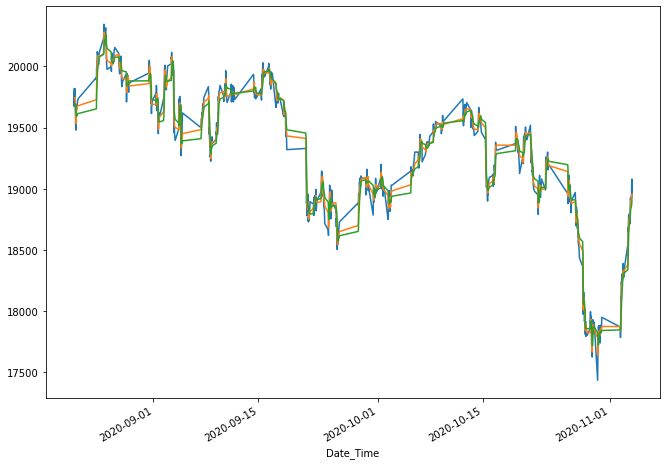

In [162]:
f, ax = plt.subplots(figsize=(11,8))

dollar_bars['Close'].plot()
dollar_bars['Fast_mavg'].plot()
dollar_bars['Slow_mavg'].plot()

In [163]:
volatilities['trgt_return']=0.01 #scelgo target return da considerare per lo stop loss e take profit (se return una volta aperta la posizione è >1% o <-1% chiudo la posizione)
# dovrei vedere meglio il calcolo dei returns: dovrei usare log returns e chiudere la posizione quando la somma del return dal momento dell'apertura supera 1% o va al di sotto -1%
trgt = volatilities['trgt_return'].loc[tEvents] #selezione i target returns nella barra in cui volatilità effettiva è > volatilità stimata media
t1= t1.reindex(tEvents)# per ogni giorno che si verifica volatilità effettiva > della stimata media inseriamo la barriera verticale il giorno dopo
side = dollar_bars['Side'].loc[tEvents] # per ogni giorno che si verifica volatilità effettiva > della stimata media inseriamo la side buy=1 sell=-1
events = pd.concat({'t1':t1,'trgt':trgt,'side':side},axis=1)

In [164]:
def new_ptslt1(close, events, ptsl):
    """Apply stop loss/profit taking, if it takes place before t1 (end of event)"""
    # Sample a subset with specific indices
    _events = events
    # Time limit
    
    out = _events[['t1']].copy(deep=True)
    # Set Profit Taking and Stop Loss
    if ptsl[0] > 0:
        pt = ptsl[0] *  _events["trgt"]
    else:
        # Switch off profit taking
        pt = pd.Series(index=_events.index) #NaNs
    if ptsl[1] > 0:
        sl = -ptsl[1] * _events["trgt"]
    else:
        # Switch off stop loss
        sl = pd.Series(index=_events.index) # NaNs
    for loc, t1 in _events['t1'].fillna(close.index[-1]).iteritems(): #fill Na with the last date
        df0 = close[loc:t1] # riporto close per ogni barra t1 
        # Change the direction depending on the side
        df0 = (df0 / close[loc] - 1)* _events.at[loc, 'side'] # at Similar to loc, in that both provide label-based lookups. Use at if you only need to get or set a single value in a DataFrame or Series. 
        #questo è il return in caso non viene colpito ne stop loss ne take profit.
        out.loc[loc, 'sl'] = df0[df0 < sl[loc]].index.min() #earliest stop loss
        out.loc[loc, 'pt'] = df0[df0 > pt[loc]].index.min() #earliest profit taking
    return out

In [165]:
ptsl = [1,2]
eventi=new_ptslt1(dollar_bars.Close,events,ptsl)

In [166]:
eventi['side'] = side

In [167]:
eventi['sl'].describe()

count                       5
unique                      5
top       2020-10-28 08:23:14
freq                        1
first     2020-09-03 17:04:38
last      2020-10-30 08:01:15
Name: sl, dtype: object

In [168]:
def new_get_bins(events, close):
    # Prices algined with events
    events = events.dropna(subset=['t1'])
    px = events.index.union(events['t1'].values).drop_duplicates()
    px = close.reindex(px, method='bfill')
    # Create out object
    out = pd.DataFrame(index=events.index)
    out['ret'] = px.loc[events['t1'].values].values / px.loc[events.index] - 1.
    if 'side' in events:
        out['ret'] *= events['side']
    out['bin'] = np.sign(out['ret'])
    if 'side' in events:
        out.loc[out['ret'] <= 0, 'bin'] = 0
    return out

In [169]:
bins = new_get_bins(eventi,dollar_bars.Close)

In [170]:
bins['bin'].value_counts()

0.0    397
1.0     20
Name: bin, dtype: int64

## b)

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, classification_report

In [194]:
data = pd.concat({'side':side,'bins':pd.Series(bins.bin)},axis=1)

In [196]:
data.dropna(inplace=True)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       201
         1.0       0.44      0.50      0.47         8

    accuracy                           0.96       209
   macro avg       0.71      0.74      0.72       209
weighted avg       0.96      0.96      0.96       209



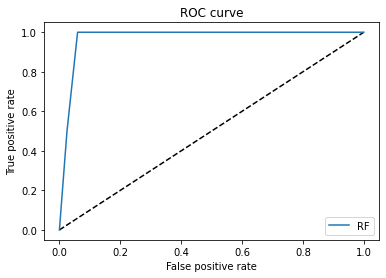

In [201]:
X = data.side.values.reshape(-1,1)
y = data.bins

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                    shuffle=False)
n_estimator = 10000
rf = RandomForestClassifier(max_depth=2, n_estimators=n_estimator,
                            criterion='entropy')
rf.fit(X_train, y_train)

# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
y_pred = rf.predict(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
print(classification_report(y_test, y_pred))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# 3.5)

In [202]:
X=np.array([[1,0],[0,1]])
Y=np.array([[2,1],[1,2]]) 
Z=np.dot(X,Y)

In [203]:
Z

array([[2, 1],
       [1, 2]])